In [1]:

import random

import math
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import datetime

"""
%load_ext autoreload
%autoreload 2
from context import rmlib
import rmlib.rmtools as rm

config = {
    'active_components' : {
        'camera' : ['my_camera'],
        'hand' : ['my_hand'],
        'arm' : [],
        'cart' : [],
    },
    'my_components' : {
        'my_hand' : {
            "module_name" : "hands.vgc10",
            "class_name" : "VGC10",
            "finger_length": 0.0415,
            "finger_width_outer" : 0.015,
            "finger_width_inner" : 0.0,
            "finger_depth" : 0.014
        },
        'my_arm' : {
            "module_name" : "arms.ur5",
            "class_name" : "UR5",
            "ip_address" : "10.1.10.112",
            "xmlrpc_port" : "8003",
            "max_linear_speed" : 0.25,
            "max_linear_accel" : 1.2,
            "max_joint_speed" : 1.5,
            "max_joint_accel" : 1.4,
            "default_linear_speed" : 0.1,
            "default_joint_speed" : 0.7,
            "default_linear_accel" : 0.8,
            "default_joint_accel" : 0.8,
            
        },
        'my_camera' : {
            'module_name' : 'cameras.realsense',
            'class_name' : 'RealSense',
            'camera_model' : 'd415',
            'ci_cam_offset' : [-0.0179, -0.0753, -0.02],
            'pc_cam_offset' : [-0.0179, -0.0753, -0.02],
        },        
    },
    'models_path' : '/home/nvidia/dev_rmstudio/detectron_models/', 
}
robot = rmlib.robot.Robot(config)

import pyrealsense2 as rs
depth_sensor = robot.camera.profile.get_device().first_depth_sensor()
depth_sensor.set_option(rs.option.visual_preset, 4)

"""

'\n%load_ext autoreload\n%autoreload 2\nfrom context import rmlib\nimport rmlib.rmtools as rm\n\nconfig = {\n    \'active_components\' : {\n        \'camera\' : [\'my_camera\'],\n        \'hand\' : [\'my_hand\'],\n        \'arm\' : [],\n        \'cart\' : [],\n    },\n    \'my_components\' : {\n        \'my_hand\' : {\n            "module_name" : "hands.vgc10",\n            "class_name" : "VGC10",\n            "finger_length": 0.0415,\n            "finger_width_outer" : 0.015,\n            "finger_width_inner" : 0.0,\n            "finger_depth" : 0.014\n        },\n        \'my_arm\' : {\n            "module_name" : "arms.ur5",\n            "class_name" : "UR5",\n            "ip_address" : "10.1.10.112",\n            "xmlrpc_port" : "8003",\n            "max_linear_speed" : 0.25,\n            "max_linear_accel" : 1.2,\n            "max_joint_speed" : 1.5,\n            "max_joint_accel" : 1.4,\n            "default_linear_speed" : 0.1,\n            "default_joint_speed" : 0.7,\n        

In [5]:
# Capture image

color_img = cv2.imread('savedImage.jpg',1)
depth_img = cv2.imread('saveddepthImage.jpg',1)
color_img, depth_img, full_cloud = robot.camera.get_all_aligned()

# Show
rm.viewer.show_image(color_img)
rm.viewer.show_image(depth_img)

filename = 'savedImage.jpg'
  
# Using cv2.imwrite() method 
# Saving the image 
cv2.imwrite('savedImage.jpg', color_img) 
cv2.imwrite('saveddepthImage.jpg', depth_img) 

NameError: name 'rm' is not defined

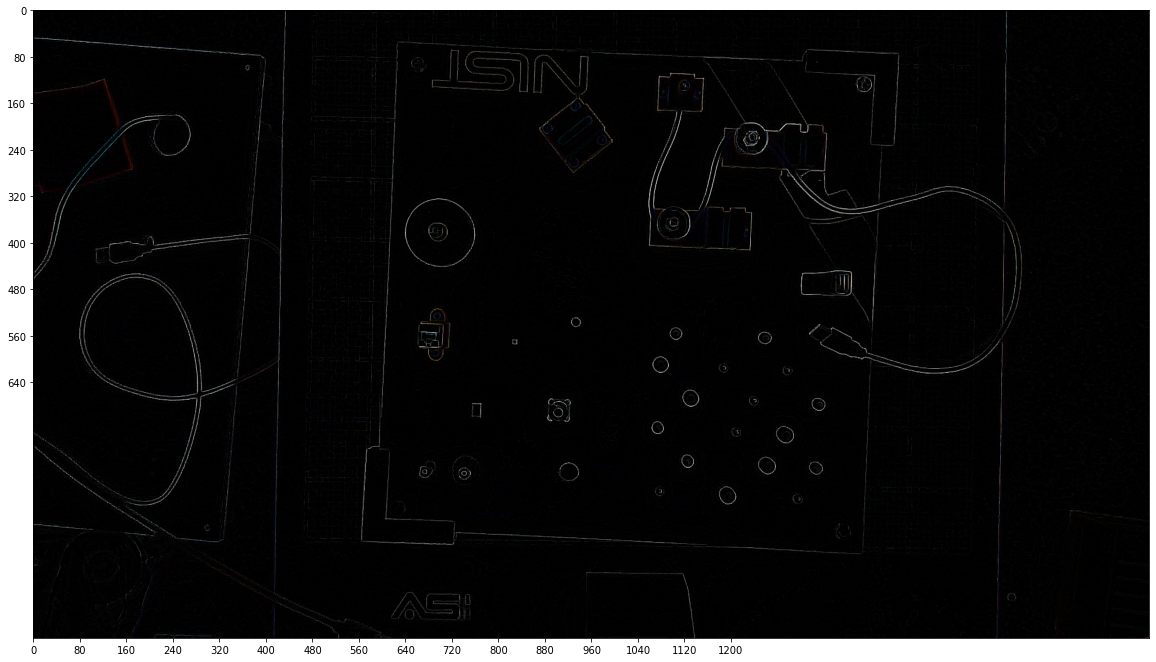

In [11]:
# Capture image
color_img, depth_img, full_cloud = robot.camera.get_all_aligned()

# Show
#rm.viewer.show_image(color_img)
#rm.viewer.show_image(depth_img)


#ddepth = cv2.CV_16S
ddepth = cv2.CV_8UC1

kernel_size = 3
    
#src_gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
#hsv = cv2.cvtColor(color_img, cv2.COLOR_BGR2HSV)
#hsv = cv2.Laplacian(hsv,cv2.CV_64F) #gradient filter
#laplacian=hsv

#rm.viewer.show_image(src_gray)

#color_img2=cv2.Laplacian(color_img, ddepth, ksize=kernel_size)
#rm.viewer.show_image(color_img2)


kernel = np.ones((5, 5), np.uint8)
   # kernel = np.ones((3, 3), np.uint8)
e = cv2.erode(color_img, kernel)
ed = cv2.dilate(e,kernel)

color_img3=cv2.Laplacian(ed, ddepth, ksize=kernel_size)
rm.viewer.show_image(color_img3)
  

    
   

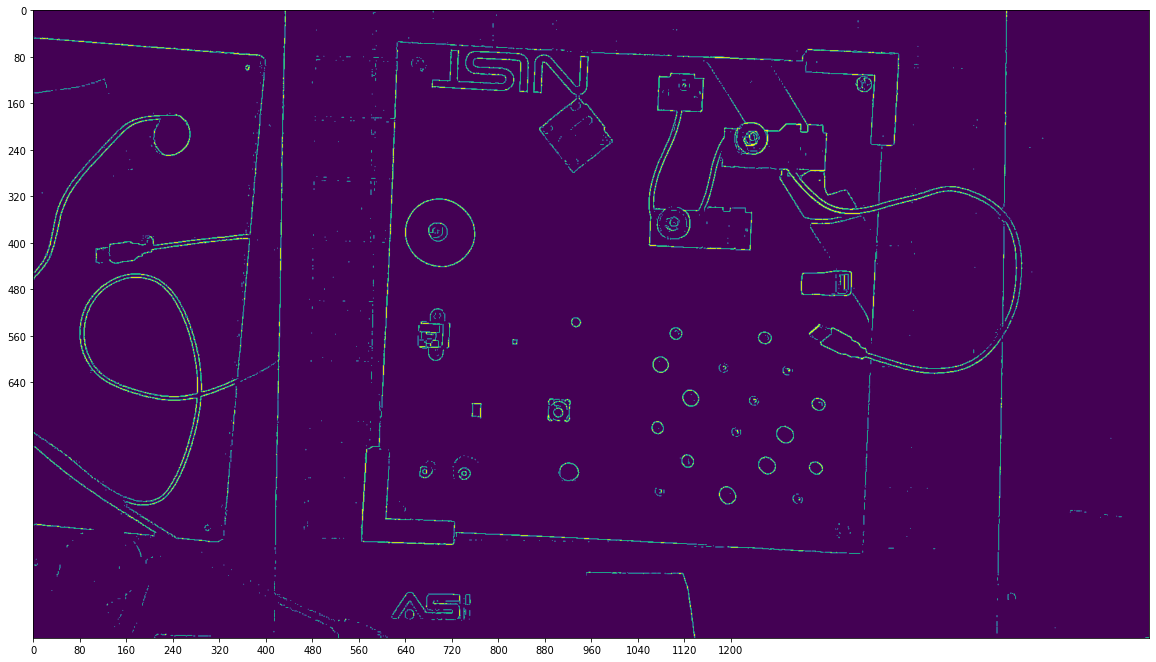

'\ncnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,\n\tcv2.CHAIN_APPROX_SIMPLE)\ncnts = imutils.grab_contours(cnts)\nsd = ShapeDetector()\n'

In [23]:
gray = cv2.cvtColor(color_img3, cv2.COLOR_BGR2GRAY)
frame = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
#blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(gray, 35, 255, cv2.THRESH_BINARY)[1]
# find contours in the thresholded image and initialize the
# shape detector
rm.viewer.show_image(thresh)


"""
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()
"""


In [27]:
import time
font = cv2.FONT_HERSHEY_COMPLEX
timelimit=0.5
timestampsize = 17
timestamp = np.ones(timestampsize)
timestamp = timestamp*99

currenttimestamp = 0
stopcounter=0
octocount = 0
timetotal=99


if int(cv2.__version__[0]) > 3:
    # Opencv 4.x.x
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
else:
    # Opencv 3.x.x
    _, contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    cnt = cv2.convexHull(cnt) #convex hull
    area = cv2.contourArea(cnt)
    approx = cv2.approxPolyDP(cnt, 0.02*cv2.arcLength(cnt, True), True)
    x = approx.ravel()[0]
    y = approx.ravel()[1]

    if area > 1000: #400 was default
        cv2.drawContours(color_img, [approx], 0, (0,159,0), 5)
# cv2.drawContours(frame, [approx], -1, (0, 255, 0), 3)
        #if len(approx) == 3 and cv2.isContourConvex(cnt) ==True:
       #     cv2.putText(frame, "Triangle", (x, y), font, 1, (0, 0, 0))
       # elif len(approx) == 4 and cv2.isContourConvex(cnt) ==True:
        #    cv2.putText(frame, "Rectangle", (x, y), font, 1, (0, 0, 0))
        #elif len(approx) == 8: #and area > 700:
        if len(approx) == 8: #and area > 700:
            cv2.putText(frame, "Octagon", (x, y), font, 1, (0, 0, 255))
            print("Octagon found!", octocount )
            octocount +=1
            timestamp[currenttimestamp]=time.time()

            for n in range(0,(timestampsize-1)):
                timetotal += (timestamp[n+1]-timestamp[n])

            if timetotal<timelimit: 
                print("Stop command sent!", stopcounter )
                stopcounter +=1


            currenttimestamp += 1

            if currenttimestamp==timestampsize:
                currenttimestamp=0;

        elif 10 < len(approx) < 20 and cv2.isContourConvex(cnt) ==True:
            cv2.putText(frame, "Circle", (x, y), font, 1, (0, 0, 0))
            


Octagon found! 0
Stop command sent! 0
Octagon found! 1
Stop command sent! 1


In [2]:
"""
cap = cv2.VideoCapture(2)
colorchooser=6;
# 1- color sliders
# 2- red
# 3- blue
# 4- green
# 5- yellow
# 6- wide detection for gradient filter - BEST!

if colorchooser==1:
   cv2.namedWindow("Trackbars")
   cv2.createTrackbar("L-H", "Trackbars", 0, 180, nothing)
   cv2.createTrackbar("L-S", "Trackbars", 66, 255, nothing)
   cv2.createTrackbar("L-V", "Trackbars", 134, 255, nothing)
   cv2.createTrackbar("U-H", "Trackbars", 180, 180, nothing)
   cv2.createTrackbar("U-S", "Trackbars", 255, 255, nothing)
   cv2.createTrackbar("U-V", "Trackbars", 243, 255, nothing)

font = cv2.FONT_HERSHEY_COMPLEX
timelimit=0.5
timestampsize = 17
timestamp = np.ones(timestampsize)
timestamp = timestamp*99

currenttimestamp = 0
stopcounter=0
octocount = 0
timetotal=99


while True:
    _, frame = cap.read()
   # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    hsv = cv2.Laplacian(hsv,cv2.CV_64F) #gradient filter
    laplacian=hsv
    #print(time.time())
    

    if colorchooser==1:
        l_h = cv2.getTrackbarPos("L-H", "Trackbars")
        l_s = cv2.getTrackbarPos("L-S", "Trackbars")
        l_v = cv2.getTrackbarPos("L-V", "Trackbars")
        u_h = cv2.getTrackbarPos("U-H", "Trackbars")
        u_s = cv2.getTrackbarPos("U-S", "Trackbars")
        u_v = cv2.getTrackbarPos("U-V", "Trackbars")

        lower = np.array([l_h, l_s, l_v])
        upper = np.array([u_h, u_s, u_v])

    elif colorchooser==2:
#red
        lower = np.array([0, 66, 134])
        upper = np.array([20, 255, 245])

    elif colorchooser==3:
#blue
        lower = np.array([38, 86, 0])
        upper = np.array([121, 255, 255])

    elif colorchooser==4:
#green
        lower = np.array([88, 54, 44])
        upper = np.array([146, 255, 76])

    elif colorchooser==5:
#yellow
        lower = np.array([41, 54, 44])
        upper = np.array([75, 255, 76])
    elif colorchooser==6:
#yellow
        lower = np.array([0, 0, 0])
        upper = np.array([255, 255, 255])


    mask = cv2.inRange(hsv, lower, upper)

    kernel = np.ones((5, 5), np.uint8)
   # kernel = np.ones((3, 3), np.uint8)
    mask = cv2.erode(mask, kernel)
    mask = cv2.dilate(mask,kernel)

"""  
    
# Contours detection
if int(cv2.__version__[0]) > 3:
    # Opencv 4.x.x
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
else:
    # Opencv 3.x.x
    _, contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    cnt = cv2.convexHull(cnt) #convex hull
    area = cv2.contourArea(cnt)
    approx = cv2.approxPolyDP(cnt, 0.02*cv2.arcLength(cnt, True), True)
    x = approx.ravel()[0]
    y = approx.ravel()[1]

    if area > 1000: #400 was default
        cv2.drawContours(frame, [approx], 0, (0,159,0), 5)
# cv2.drawContours(frame, [approx], -1, (0, 255, 0), 3)
        #if len(approx) == 3 and cv2.isContourConvex(cnt) ==True:
       #     cv2.putText(frame, "Triangle", (x, y), font, 1, (0, 0, 0))
       # elif len(approx) == 4 and cv2.isContourConvex(cnt) ==True:
        #    cv2.putText(frame, "Rectangle", (x, y), font, 1, (0, 0, 0))
        #elif len(approx) == 8: #and area > 700:
        if len(approx) == 8: #and area > 700:
            cv2.putText(frame, "Octagon", (x, y), font, 1, (0, 0, 255))
            print("Octagon found!", octocount )
            octocount +=1
            timestamp[currenttimestamp]=time.time()

            for n in range(0,(timestampsize-1)):
                timetotal += (timestamp[n+1]-timestamp[n])

            if timetotal<timelimit: 
                print("Stop command sent!", stopcounter )
                stopcounter +=1


            currenttimestamp += 1

            if currenttimestamp==timestampsize:
                currenttimestamp=0;

        elif 10 < len(approx) < 20 and cv2.isContourConvex(cnt) ==True:
            cv2.putText(frame, "Circle", (x, y), font, 1, (0, 0, 0))


cv2.imshow("Frame", frame)

#cv2.imshow("Gray", gray)
cv2.imshow("laplacian", laplacian)
cv2.imshow("Mask", mask)


#sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
#sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)

#cv2.imshow("sobel_x", sobelx)
#cv2.imshow("sobel_y", sobely)


# Contours detection
if int(cv2.__version__[0]) > 3:
    # Opencv 4.x.x
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
else:
    # Opencv 3.x.x
    _, contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    cnt = cv2.convexHull(cnt) #convex hull
    area = cv2.contourArea(cnt)
    approx = cv2.approxPolyDP(cnt, 0.02*cv2.arcLength(cnt, True), True)
    x = approx.ravel()[0]
    y = approx.ravel()[1]

    if area > 1000: #400 was default
        cv2.drawContours(frame, [approx], 0, (0,159,0), 5)
# cv2.drawContours(frame, [approx], -1, (0, 255, 0), 3)
        #if len(approx) == 3 and cv2.isContourConvex(cnt) ==True:
       #     cv2.putText(frame, "Triangle", (x, y), font, 1, (0, 0, 0))
       # elif len(approx) == 4 and cv2.isContourConvex(cnt) ==True:
        #    cv2.putText(frame, "Rectangle", (x, y), font, 1, (0, 0, 0))
        #elif len(approx) == 8: #and area > 700:
        if len(approx) == 8: #and area > 700:
            cv2.putText(frame, "Octagon", (x, y), font, 1, (0, 0, 255))
            print("Octagon found!", octocount )
            octocount +=1
            timestamp[currenttimestamp]=time.time()

            for n in range(0,(timestampsize-1)):
                timetotal += (timestamp[n+1]-timestamp[n])

            if timetotal<timelimit: 
                print("Stop command sent!", stopcounter )
                stopcounter +=1


            currenttimestamp += 1

            if currenttimestamp==timestampsize:
                currenttimestamp=0;

        elif 10 < len(approx) < 20 and cv2.isContourConvex(cnt) ==True:
            cv2.putText(frame, "Circle", (x, y), font, 1, (0, 0, 0))


cv2.imshow("Frame", frame)

#cv2.imshow("Gray", gray)
cv2.imshow("laplacian", laplacian)
cv2.imshow("Mask", mask)


#sobelx = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=5)
#sobely = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=5)

#cv2.imshow("sobel_x", sobelx)
#cv2.imshow("sobel_y", sobely)



key = cv2.waitKey(1)
if key == 27:
    break

key = cv2.waitKey(1)
if key == 27:
    break

cap.release()
cv2.destroyAllWindows()

error: /build/opencv-L2vuMj/opencv-3.2.0+dfsg/modules/imgproc/src/color.cpp:9815: error: (-215) (scn == 3 || scn == 4) && (depth == CV_8U || depth == CV_32F) in function cvtColor
